## Combine the merged sales-valuation dataframe with macroeconomic data

In [3]:
# all imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path
import itertools
import datetime

from IPython.display import display
pd.options.display.max_columns = None

In [8]:
# path to retrieve files one above the github directory (adjust as needed)
above = '../../../'

In [9]:
# import the merged sales-valuation dataframe (the inner join version)
df = pd.read_pickle(above + 'inner-merged.pkl')
display(df)

,S_borough,S_neighborhood,S_building_class_category,S_block,S_lot,S_address,S_apt_number,S_zipcode,S_residential_units,S_commercial_units,S_total_units,S_land_sqft,S_gross_sqft,S_year_built,S_tax_class_at_sale,S_building_class_at_sale,S_sale_price,S_sale_date,bbl,bbl_block,bbl_lot,year,v_bble,v_boro,v_block,v_lot,v_owner,v_bldgcl,v_taxclass,v_ltfront,v_ltdepth,v_ext,v_stories,v_fullval,v_avland,v_avtot,v_staddr,v_postcode,v_bldfront,v_blddepth,v_avland2,v_avtot2,v_latitude,v_longitude,v_community_board,v_council_district,v_census_tract,v_bin,v_nta,v_new_georeferenced_column
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,03028,0025,412 EAST 179TH STREET,,10457.0,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A5,355000,2013-07-08,2030280025,03028,0025,2013/14,2030280025,2,03028,0025,SANDRA FERNANDEZ,A5,1,18,100,E,3.0,258000,7496,8557,412 EAST 179 STREET,10457.0,18,32,NaN,NaN,40.850339,-73.898762,206.0,15.0,379.0,2011104.0,Mount Hope,POINT (-73.898762 40.850339)
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,03039,0028,2329 WASHINGTON AVENUE,,10458.0,1.0,0.0,1.0,1103.0,1290.0,1910.0,1,A1,120000,2013-11-14,2030390028,03039,0028,2013/14,2030390028,2,03039,0028,"PERRY , EUGENE",A1,1,15,73,NaN,2.0,303000,5249,8460,2329 WASHINGTON AVENUE,10458.0,15,40,NaN,NaN,40.855982,-73.892503,206.0,15.0,385.0,2011364.0,Claremont-Bathgate,POINT (-73.892503 40.855982)
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,03039,0028,2329 WASHINGTON AVENUE,,10458.0,1.0,0.0,1.0,1103.0,1290.0,1910.0,1,A1,474819,2013-05-20,2030390028,03039,0028,2012/13,2030390028,2,03039,0028,"PERRY , EUGENE",A1,1,15,73,NaN,2.0,334000,4762,8460,2329 WASHINGTON AVENUE,10458.0,15,40,NaN,NaN,40.855982,-73.892503,206.0,15.0,385.0,2011364.0,Claremont-Bathgate,POINT (-73.892503 40.855982)
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,03046,0039,2075 BATHGATE AVENUE,,10457.0,1.0,0.0,1.0,1986.0,1344.0,1899.0,1,A1,210000,2013-03-12,2030460039,03046,0039,2012/13,2030460039,2,03046,0039,"VELEZ, PABLO",A1,1,21,94,NaN,2.0,206000,7137,7862,2075 BATHGATE AVENUE,10457.0,18,42,NaN,NaN,40.850459,-73.895151,206.0,15.0,395.0,2011486.0,Claremont-Bathgate,POINT (-73.895151 40.850459)
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,03046,0052,2047 BATHGATE AVENUE,,10457.0,1.0,0.0,1.0,2329.0,1431.0,1901.0,1,A1,343116,2013-07-01,2030460052,03046,0052,2013/14,2030460052,2,03046,0052,MICHAEL T DONALD,A1,1,25,93,E,2.0,200000,6979,8308,2047 BATHGATE AVENUE,10457.0,20,30,NaN,NaN,40.850031,-73.895394,206.0,15.0,395.0,2011492.0,Claremont-Bathgate,POINT (-73.895394 40.850031)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340535,5,WOODROW,02 TWO FAMILY DWELLINGS,07316,0084,57 DARNELL LANE,None,10309.0,2.0,0.0,2.0,2311.0,1500.0,1995.0,1,B2,620000,2019-06-20,5073160084,07316,0084,2018/19,5073160084,5,07316,0084,SALVATORE ANNARUMMA,B2,1,26,88,NaN,2.0,518000,6690,27072,57 DARNELL LANE,10309.0,16,44,NaN,NaN,40.536003,-74.223213,503.0,51.0,226.0,5130720.0,Charleston-Richmond Valley-Tottenville,POINT (-74.223213 40.536003)
340536,5,WOODROW,02 TWO FAMILY DWELLINGS,07317,0119,73 ROBIN COURT,None,10309.0,2.0,0.0,2.0,4125.0,2160.0,1994.0,1,B2,625000,2019-05-21,5073170119,07317,0119,2018/19,5073170119,5,07317,0119,JOSEPH DIBENEDETTO,B2,1,25,165,NaN,3.0,527000,9683,29160,73 ROBIN COURT,10309.0,22,40,NaN,NaN,40.536140,-74.222012,503.0,51.0,226.0,5125758.0,Charleston-Richmond Valley-Tottenville,POINT (-74.222012 40.53614)
340537,5,WOODROW,02 TWO FAMILY DWELLINGS,07349,0004,51 PHEASANT LANE,None,10309.0,2.0,0.0,2.0,2123.0,1850.0,1998.0,1,B9,670000,2019-02-22,5073490004,07349,0004,2018/19,5073490004,5,07349,0004,"GUITIAN, JOSEPH",B9,1,23,91,NaN,2.0,581000,6988,30528,51 PHEASANT LANE,10309.0,14,52,NaN,NaN,40.532829,-74.222422,503.0,51.0,226.0,5135567.0,Charleston-Richmond Valley-Tottenville,POINT (-74.222422 40.532829)
340538,5,WOODROW,02 TWO FAMILY DWELLINGS,07349,0035,33 QUAIL LANE,None,10309.0,2.0,0.0,2.0,2255.0,2377.0,1998.0,1,B9,

In [37]:
# based on the sale date column (s_sale_date), create additional columns for s_sale_month and s_sale_year.
df['S_sale_month'] = pd.to_datetime(df['S_sale_date']).map(lambda saledate : saledate.month)
df['S_sale_year'] = pd.to_datetime(df['S_sale_date']).map(lambda saledate : saledate.year)
display(df)

,S_borough,S_neighborhood,S_building_class_category,S_block,S_lot,S_address,S_apt_number,S_zipcode,S_residential_units,S_commercial_units,S_total_units,S_land_sqft,S_gross_sqft,S_year_built,S_tax_class_at_sale,S_building_class_at_sale,S_sale_price,S_sale_date,bbl,bbl_block,bbl_lot,year,v_bble,v_boro,v_block,v_lot,v_owner,v_bldgcl,v_taxclass,v_ltfront,v_ltdepth,v_ext,v_stories,v_fullval,v_avland,v_avtot,v_staddr,v_postcode,v_bldfront,v_blddepth,v_avland2,v_avtot2,v_latitude,v_longitude,v_community_board,v_council_district,v_census_tract,v_bin,v_nta,v_new_georeferenced_column,S_sale_month,S_sale_year
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,03028,0025,412 EAST 179TH STREET,,10457.0,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A5,355000,2013-07-08,2030280025,03028,0025,2013/14,2030280025,2,03028,0025,SANDRA FERNANDEZ,A5,1,18,100,E,3.0,258000,7496,8557,412 EAST 179 STREET,10457.0,18,32,NaN,NaN,40.850339,-73.898762,206.0,15.0,379.0,2011104.0,Mount Hope,POINT (-73.898762 40.850339),7,2013
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,03039,0028,2329 WASHINGTON AVENUE,,10458.0,1.0,0.0,1.0,1103.0,1290.0,1910.0,1,A1,120000,2013-11-14,2030390028,03039,0028,2013/14,2030390028,2,03039,0028,"PERRY , EUGENE",A1,1,15,73,NaN,2.0,303000,5249,8460,2329 WASHINGTON AVENUE,10458.0,15,40,NaN,NaN,40.855982,-73.892503,206.0,15.0,385.0,2011364.0,Claremont-Bathgate,POINT (-73.892503 40.855982),11,2013
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,03039,0028,2329 WASHINGTON AVENUE,,10458.0,1.0,0.0,1.0,1103.0,1290.0,1910.0,1,A1,474819,2013-05-20,2030390028,03039,0028,2012/13,2030390028,2,03039,0028,"PERRY , EUGENE",A1,1,15,73,NaN,2.0,334000,4762,8460,2329 WASHINGTON AVENUE,10458.0,15,40,NaN,NaN,40.855982,-73.892503,206.0,15.0,385.0,2011364.0,Claremont-Bathgate,POINT (-73.892503 40.855982),5,2013
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,03046,0039,2075 BATHGATE AVENUE,,10457.0,1.0,0.0,1.0,1986.0,1344.0,1899.0,1,A1,210000,2013-03-12,2030460039,03046,0039,2012/13,2030460039,2,03046,0039,"VELEZ, PABLO",A1,1,21,94,NaN,2.0,206000,7137,7862,2075 BATHGATE AVENUE,10457.0,18,42,NaN,NaN,40.850459,-73.895151,206.0,15.0,395.0,2011486.0,Claremont-Bathgate,POINT (-73.895151 40.850459),3,2013
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,03046,0052,2047 BATHGATE AVENUE,,10457.0,1.0,0.0,1.0,2329.0,1431.0,1901.0,1,A1,343116,2013-07-01,2030460052,03046,0052,2013/14,2030460052,2,03046,0052,MICHAEL T DONALD,A1,1,25,93,E,2.0,200000,6979,8308,2047 BATHGATE AVENUE,10457.0,20,30,NaN,NaN,40.850031,-73.895394,206.0,15.0,395.0,2011492.0,Claremont-Bathgate,POINT (-73.895394 40.850031),7,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340535,5,WOODROW,02 TWO FAMILY DWELLINGS,07316,0084,57 DARNELL LANE,None,10309.0,2.0,0.0,2.0,2311.0,1500.0,1995.0,1,B2,620000,2019-06-20,5073160084,07316,0084,2018/19,5073160084,5,07316,0084,SALVATORE ANNARUMMA,B2,1,26,88,NaN,2.0,518000,6690,27072,57 DARNELL LANE,10309.0,16,44,NaN,NaN,40.536003,-74.223213,503.0,51.0,226.0,5130720.0,Charleston-Richmond Valley-Tottenville,POINT (-74.223213 40.536003),6,2019
340536,5,WOODROW,02 TWO FAMILY DWELLINGS,07317,0119,73 ROBIN COURT,None,10309.0,2.0,0.0,2.0,4125.0,2160.0,1994.0,1,B2,625000,2019-05-21,5073170119,07317,0119,2018/19,5073170119,5,07317,0119,JOSEPH DIBENEDETTO,B2,1,25,165,NaN,3.0,527000,9683,29160,73 ROBIN COURT,10309.0,22,40,NaN,NaN,40.536140,-74.222012,503.0,51.0,226.0,5125758.0,Charleston-Richmond Valley-Tottenville,POINT (-74.222012 40.53614),5,2019
340537,5,WOODROW,02 TWO FAMILY DWELLINGS,07349,0004,51 PHEASANT LANE,None,10309.0,2.0,0.0,2.0,2123.0,1850.0,1998.0,1,B9,670000,2019-02-22,5073490004,07349,0004,2018/19,5073490004,5,07349,0004,"GUITIAN, JOSEPH",B9,1,23,91,NaN,2.0,581000,6988,30528,51 PHEASANT LANE,10309.0,14,52,NaN,NaN,40.532829,-74.222422,503.0,51.0,226.0,5135567.0,Charleston-Richmond Valley-Tottenville,POINT (-74.222422 40.532829),2,2019
340538,5,WOODROW,02 TWO FAM

In [25]:
print(df['S_sale_month'].dtype)
print(df['S_sale_year'].dtype)

int64
int64


In [11]:
# import the combined macroeconomic data from CSV file
macro = pd.read_csv(above + 'macroeconomic_data.csv')
display(macro)

,YEAR,MONTH,10Yr Treasury Constant Maturity Rate,30Yr Fixed Rate Mortgage Avg in US,Case-Shiller NY Home Price Index,Case-Shiller US National Home Price Index,Consumer Price Index,Core CPI,Effective Fed Funds Rate,Inflation Rate,Population Level,Real Gross Domestic Product,SP500 Index,Unemployment Rate,US Real Median Household Income,10Yr Treasury Constant Maturity Rate %Chg,30Yr Fixed Rate Mortgage Avg in US %Chg,Case-Shiller NY Home Price Index %Chg,Case-Shiller US National Home Price Index %Chg,Consumer Price Index %Chg,Core CPI %Chg,Effective Fed Funds Rate %Chg,Inflation Rate %Chg,Population Level %Chg,Real Gross Domestic Product %Chg,SP500 Index %Chg,Unemployment Rate %Chg,US Real Median Household Income %Chg
0,2011,1,3.391905,4.7550,167.189630,141.525,221.187,222.803,0.168387,3.156842,311023.0,15712.754000,1283.124286,9.1,57021.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,2,3.577000,4.9525,166.614113,140.354,221.898,223.213,0.156786,3.066216,311173.0,15750.201333,1322.212500,9.0,57011.916667,0.054570,0.041535,-0.003442,-0.008274,0.003214,0.001840,-0.068897,-0.028708,0.000482,0.002383,0.030463,-0.010989,-0.000159
2,2011,3,3.414348,4.8360,165.520460,139.983,223.046,223.454,0.138710,2.975591,311333.0,15787.648667,1304.486087,9.0,57002.833333,-0.045472,-0.023523,-0.006564,-0.002643,0.005174,0.001080,-0.115291,-0.029556,0.000514,0.002378,-0.013407,0.000000,-0.000159
3,2011,4,3.453333,4.8400,167.123040,140.006,224.093,223.727,0.098000,2.884965,311502.0,15825.096000,1331.784762,9.1,56993.750000,0.011418,0.000827,0.009682,0.000164,0.004694,0.001222,-0.293488,-0.030456,0.000543,0.002372,0.020927,0.011111,-0.000159
4,2011,5,3.164091,4.6375,166.837997,139.898,224.806,224.175,0.093871,2.794340,311678.0,15823.630667,1337.982727,9.0,56984.666667,-0.083757,-0.041839,-0.001706,-0.000771,0.003182,0.002002,-0.042133,-0.031413,0.000565,-0.000093,0.004654,-0.010989,-0.000159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2019,8,1.626364,3.6160,198.826921,209.813,256.294,264.180,2.125806,1.812210,328730.0,19179.149000,2897.498182,3.7,68703.000000,-0.208498,-0.039575,-0.009133,0.000892,0.000808,0.002250,-0.115317,0.000000,0.000514,0.001954,-0.032910,0.000000,0.000000
104,2019,9,1.690000,3.6050,201.053048,210.959,256.593,264.682,2.043000,1.812210,328897.0,19216.554000,2979.503810,3.5,68703.000000,0.039128,-0.003042,0.011196,0.005462,0.001167,0.001900,-0.038953,0.000000,0.000508,0.001950,0.028302,-0.054054,0.000000
105,2019,10,1.709130,3.6880,201.999229,211.800,257.229,264.987,1.829677,1.812210,329054.0,19253.959000,2977.675217,3.6,68703.000000,0.011320,0.023024,0.004706,0.003987,0.002479,0.001152,-0.104416,0.000000,0.000477,0.001946,-0.000614,0.028571,0.000000
106,2019,11,1.816190,3.6950,202.494800,212.687,257.824,265.501,1.553333,1.812210,329191.0,19253.959000,3107.224762,3.5,68703.000000,0.062640,0.001898,0.002453,0.004188,0.002313,0.001940,-0.151034,0.000000,0.000416,0.000000,0.043507,-0.027778,0.000000


In [20]:
# check the dtypes on the macro df year and month cols
print(macro['YEAR'].dtype)
print(macro['MONTH'].dtype)

int64
int64


In [28]:
# join the merged sales-valuation dataframe with the macroeconomic data on (year, month) of the SALE DATE
merged = pd.merge(df, macro, how='inner', left_on=['S_sale_year', 'S_sale_month'], right_on=['YEAR', 'MONTH'])

'''
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
'''

"\npd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,\n         left_index=False, right_index=False, sort=True,\n         suffixes=('_x', '_y'), copy=True, indicator=False,\n         validate=None)\n"

In [38]:
merged.shape

(340540, 80)

In [31]:
# sanity check the merge
display(merged[['S_sale_price', 'S_sale_date', 'S_sale_month', 'S_sale_year', 'YEAR', 'MONTH']])

,S_sale_price,S_sale_date,S_sale_month,S_sale_year,YEAR,MONTH
0,355000,2013-07-08,7,2013,2013,7
1,343116,2013-07-01,7,2013,2013,7
2,235000,2013-07-30,7,2013,2013,7
3,165000,2013-07-29,7,2013,2013,7
4,205000,2013-07-30,7,2013,2013,7
...,...,...,...,...,...,...
340535,635000,2019-06-11,6,2019,2019,6
340536,855000,2019-06-17,6,2019,2019,6
340537,870000,2019-06-28,6,2019,2019,6
340538,778961,2019-06-10,6,2019,2019,6


In [51]:
sales_per_month = df.groupby(['S_sale_year', 'S_sale_month'])['S_sale_date'].count()
pd.options.display.max_rows = None
print(sales_per_month)

S_sale_year  S_sale_month
2013         1               3499
             2               3286
             3               3580
             4               3935
             5               4627
             6               4781
             7               5169
             8               5199
             9               4502
             10              5130
             11              4202
             12              4634
2014         1               4125
             2               3573
             3               4017
             4               3876
             5               4349
             6               4639
             7               5195
             8               4615
             9               4665
             10              4728
             11              3853
             12              4637
2015         1               3744
             2               3759
             3               4212
             4               4038
             5        

(array([ 3.,  4., 14.,  9., 11., 13., 12.,  4.,  7.,  1.]),
 array([3286., 3513., 3740., 3967., 4194., 4421., 4648., 4875., 5102.,
        5329., 5556.]),
 <a list of 10 Patch objects>)

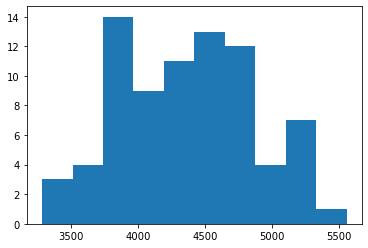

In [49]:
plt.hist(sales_per_month)

## Write to pickle

In [ ]:
pd.to_pickle(merged, above + 'merged-sales-valuation-macroeconomic.pkl')